<a href="https://colab.research.google.com/github/linashmyak/MLL/blob/main/ML4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_proba = model.predict_proba(X_test)

In [ ]:
#y_pred_proba

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

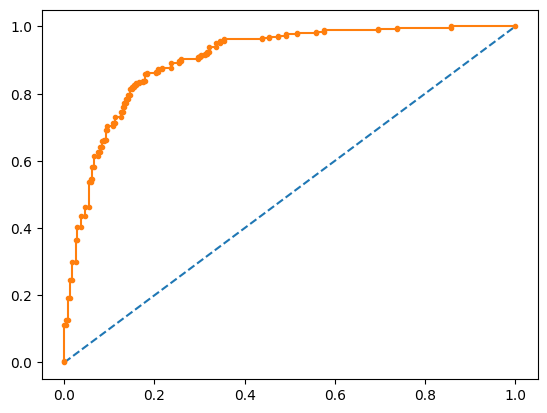

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])

np.float64(0.9027724358974359)

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

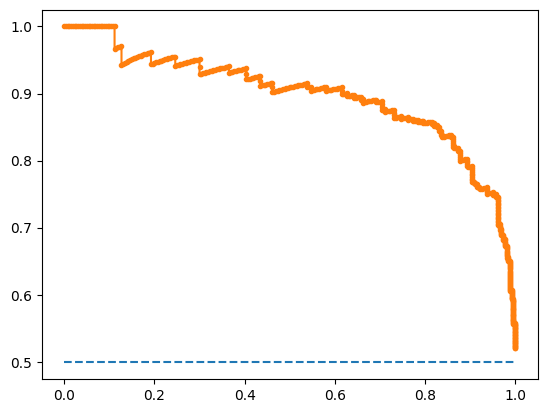

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)

np.float64(0.897662372903334)

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



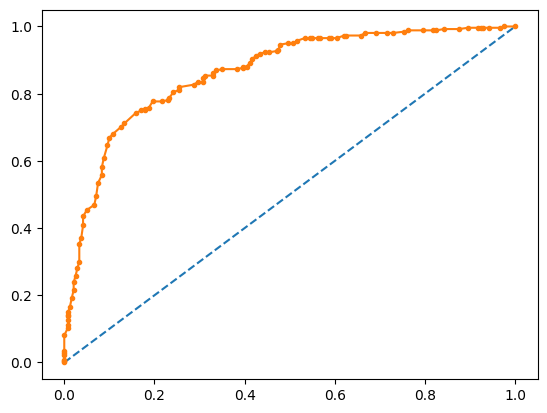

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

np.float64(0.8630608974358974)

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [ ]:
print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.33      0.14      0.20         7

    accuracy                           0.98       500
   macro avg       0.66      0.57      0.60       500
weighted avg       0.98      0.98      0.98       500



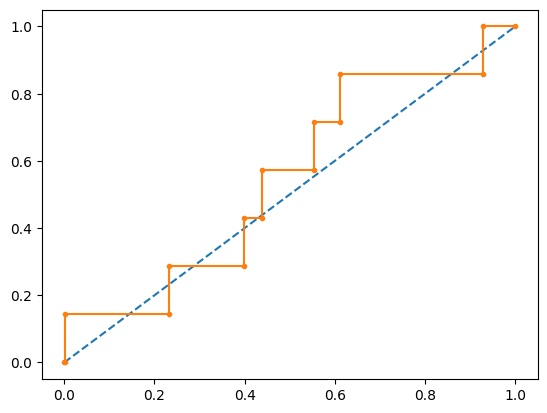

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

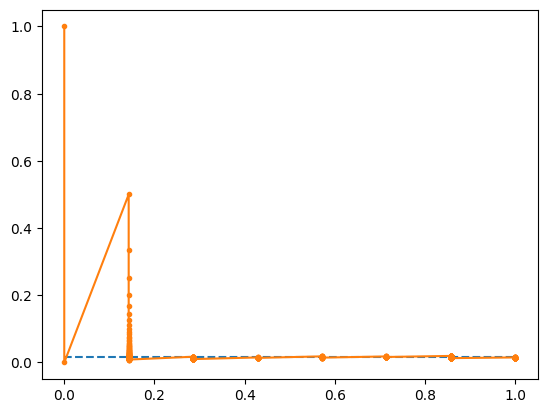

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

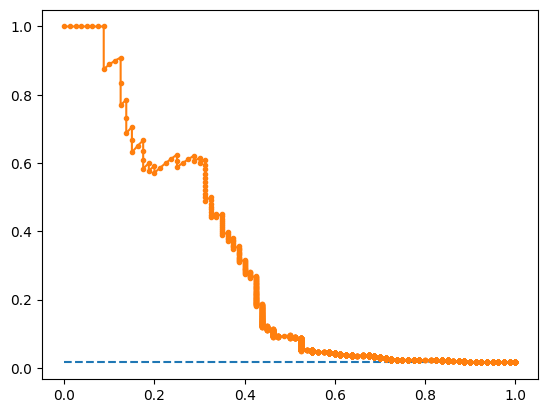

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [ ]:
from numpy import argmax

In [ ]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

np.float64(0.26860282117400097)

In [ ]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.268603, F-Score=0.413


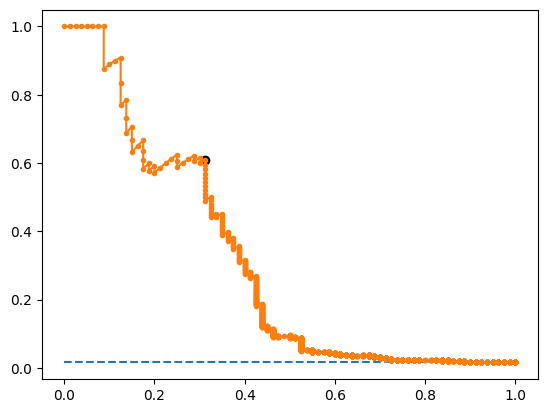

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.60      0.30      0.40        80

    accuracy                           0.99      5000
   macro avg       0.79      0.65      0.70      5000
weighted avg       0.98      0.99      0.98      5000



In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.71      0.15      0.25        80

    accuracy                           0.99      5000
   macro avg       0.85      0.57      0.62      5000
weighted avg       0.98      0.99      0.98      5000



**Самостоятельные**

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
def plot_decision_boundary(model, X, y, threshold=0.5):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = (Z > threshold).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.RdBu)
    plt.title(f'Граница при пороге: {threshold}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()

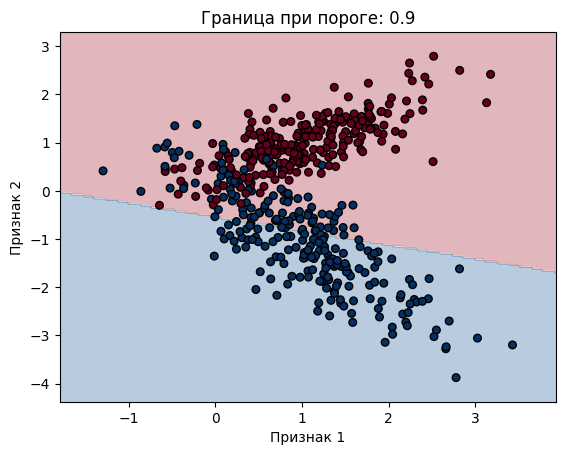

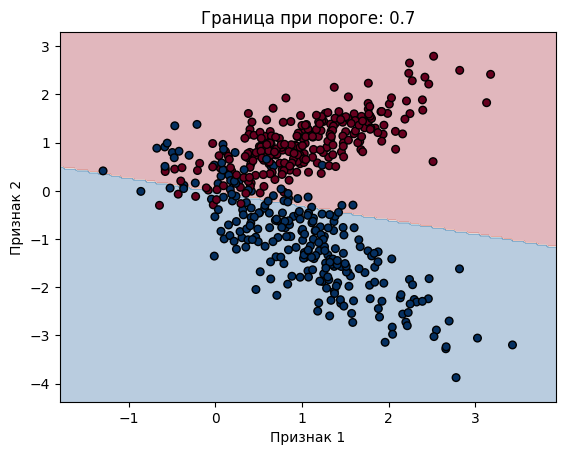

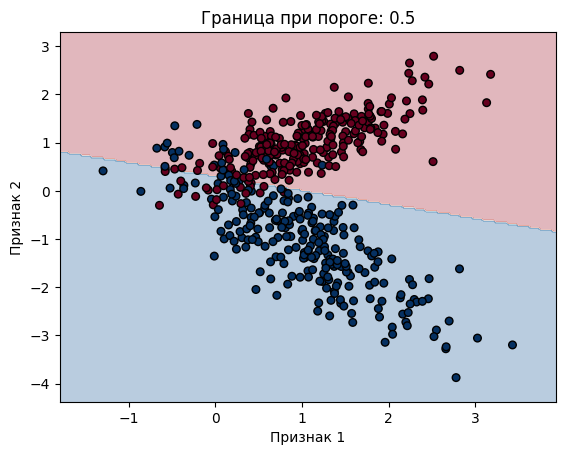

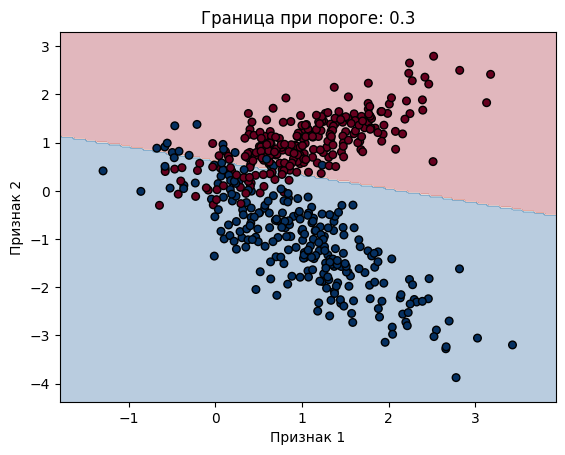

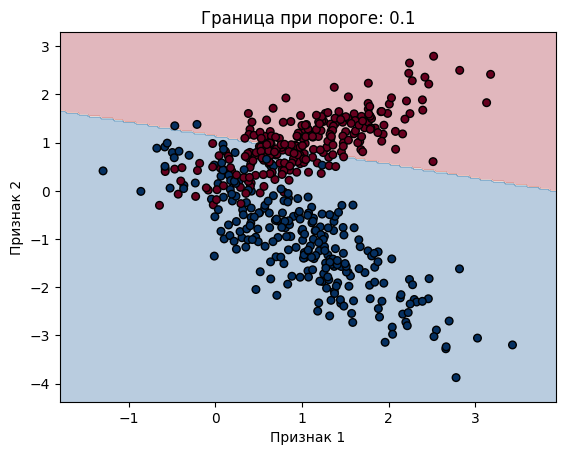

In [ ]:
for t in [0.9, 0.7, 0.5, 0.3, 0.1]:
    plot_decision_boundary(model, X_test, y_test, threshold=t)

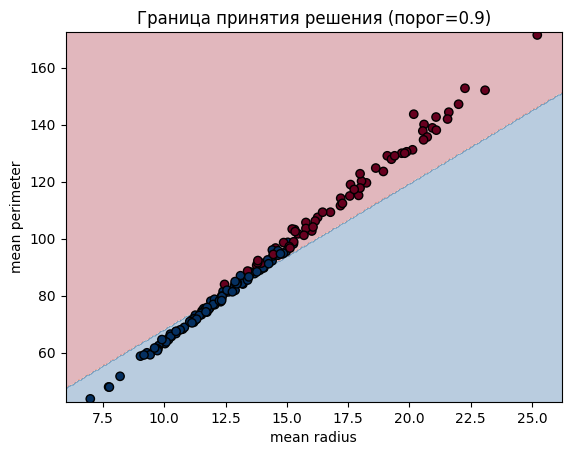

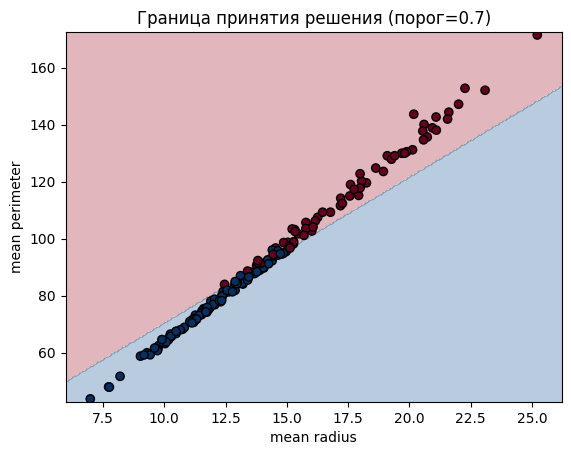

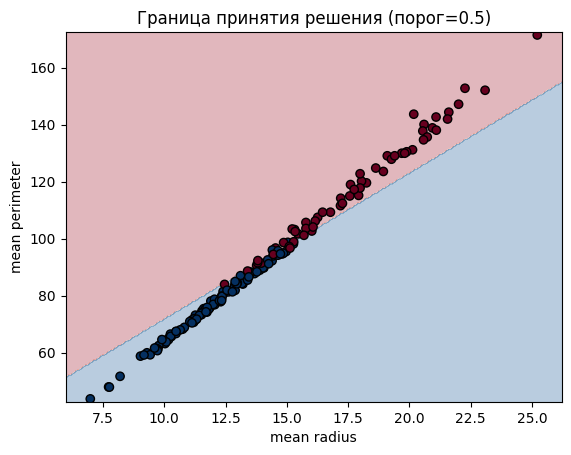

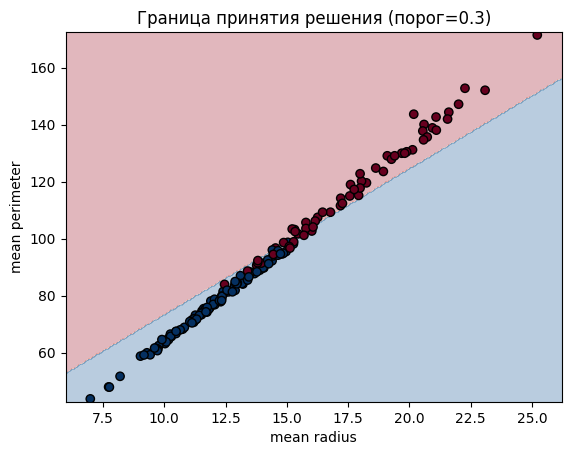

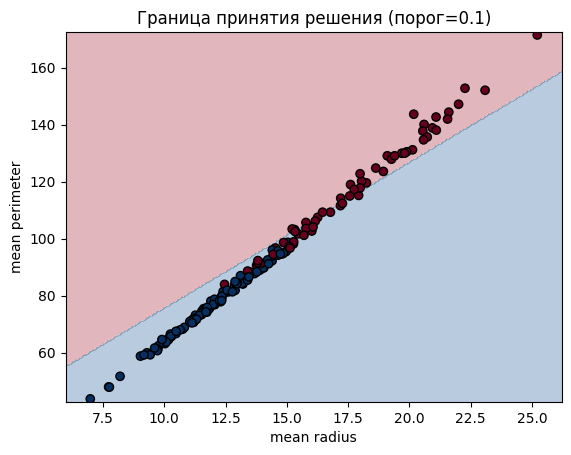

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, [0, 2]]  # используем только два признака для визуализации
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression().fit(X_train, y_train)

def plot_real_data_decision_boundary(model, X, y, threshold=0.5):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = (Z > threshold).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdBu)
    plt.xlabel('mean radius')
    plt.ylabel('mean perimeter')
    plt.title(f'Граница принятия решения (порог={threshold})')
    plt.show()

for t in [0.9, 0.7, 0.5, 0.3, 0.1]:
    plot_real_data_decision_boundary(model, X_test, y_test, threshold=t)

In [ ]:
# Предсказания вероятностей положительного класса
y_scores = model.predict_proba(X_test)[:, 1]

# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Вычисляем G-Mean
gmeans = np.sqrt(tpr * (1 - fpr))

# Находим индекс максимального G-Mean
ix = np.argmax(gmeans)
best_threshold = thresholds[ix]

# Печатаем
print(f"Оптимальный порог по G-Mean: {best_threshold:.3f}")
print(f"G-Mean при этом пороге: {gmeans[ix]:.3f}")

Оптимальный порог по G-Mean: 0.693
G-Mean при этом пороге: 0.957


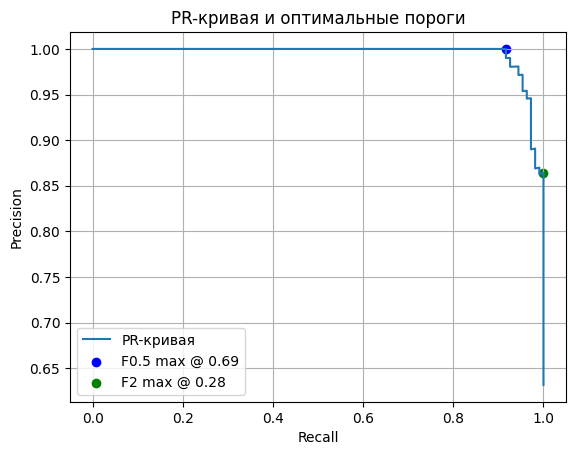

F0.5-оптимальный порог: 0.693
→ Precision: 1.000, Recall: 0.917, F1: 0.957

F2-оптимальный порог: 0.282
→ Precision: 0.864, Recall: 1.000, F1: 0.927



In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Предсказанные вероятности
y_scores = model.predict_proba(X_test)[:, 1]

# PR-кривая
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Убираем последний элемент (он появляется из-за порогов < N)
thresholds = thresholds

# Вычисляем F0.5 и F2
f05 = (1 + 0.5**2) * (precision[:-1] * recall[:-1]) / (0.5**2 * precision[:-1] + recall[:-1] + 1e-8)
f2  = (1 + 2**2)   * (precision[:-1] * recall[:-1]) / (2**2   * precision[:-1] + recall[:-1] + 1e-8)

# Находим лучшие пороги
ix_f05 = np.argmax(f05)
ix_f2  = np.argmax(f2)

threshold_f05 = thresholds[ix_f05]
threshold_f2 = thresholds[ix_f2]
plt.plot(recall, precision, label='PR-кривая')
plt.scatter(recall[ix_f05], precision[ix_f05], color='blue', label=f'F0.5 max @ {threshold_f05:.2f}')
plt.scatter(recall[ix_f2], precision[ix_f2], color='green', label=f'F2 max @ {threshold_f2:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая и оптимальные пороги')
plt.legend()
plt.grid()
plt.show()
for t, label in zip([threshold_f05, threshold_f2], ['F0.5', 'F2']):
    y_pred = (y_scores >= t).astype(int)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{label}-оптимальный порог: {t:.3f}")
    print(f"→ Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}\n")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


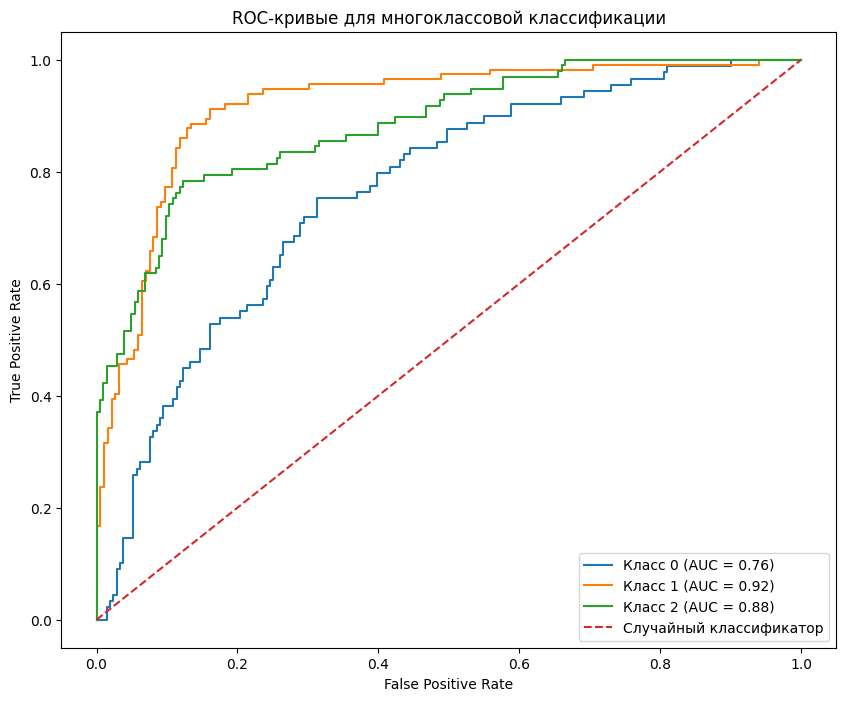

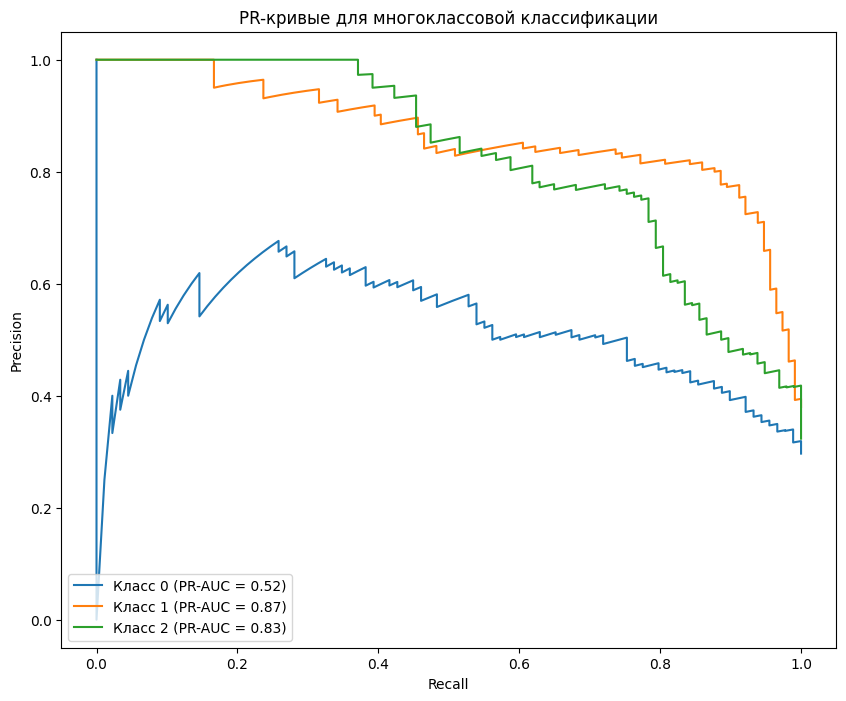

In [ ]:
from sklearn.preprocessing import label_binarize

X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42)

# Разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучим модель логистической регрессии для многоклассовой классификации
model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')
model.fit(X_train, y_train)

# Получаем вероятности для каждого класса
y_pred_proba = model.predict_proba(X_test)

# Бинаризуем метки классов для использования с ROC и PR-кривыми
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # преобразуем метки в формат One-vs-Rest

# Построим ROC кривые для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Для каждого класса
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Изобразим ROC кривые
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Класс {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайный классификатор')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для многоклассовой классификации')
plt.legend(loc='lower right')
plt.show()

# Построим PR-кривые для каждого класса
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(3):  # Для каждого класса
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Изобразим PR кривые
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(recall[i], precision[i], label=f'Класс {i} (PR-AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривые для многоклассовой классификации')
plt.legend(loc='lower left')
plt.show()

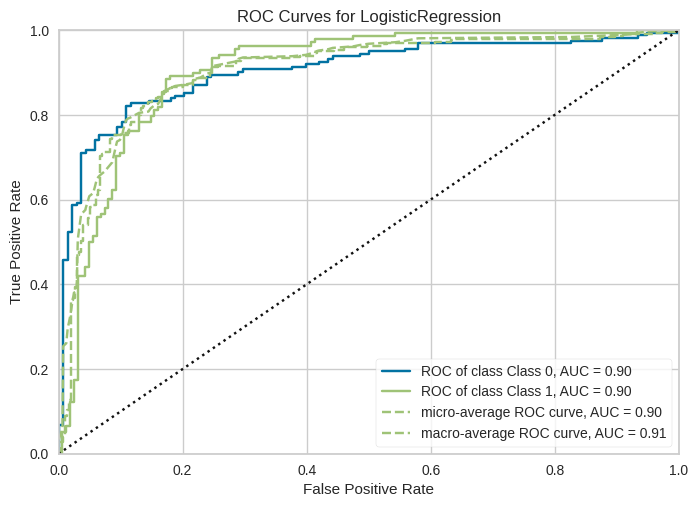

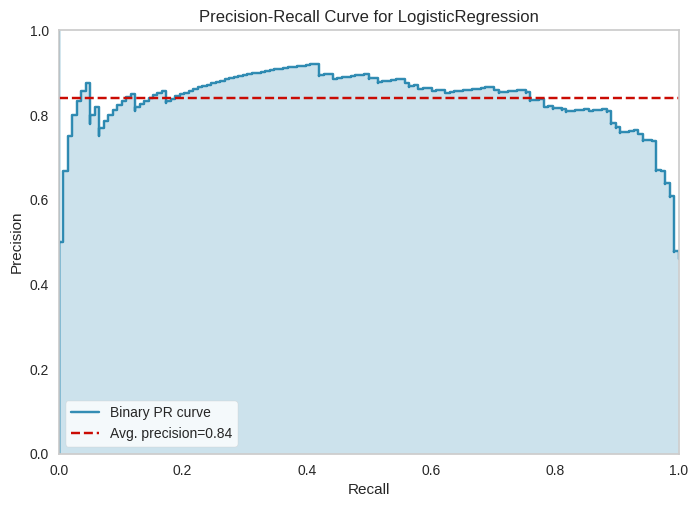

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

# Создание синтетических данных для задачи бинарной классификации
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация классификатора (логистическая регрессия)
model = LogisticRegression()

# Обучение модели
model.fit(X_train, y_train)

# ROC AUC с помощью Yellowbrick
visualizer = ROCAUC(model, classes=['Class 0', 'Class 1'])
visualizer.fit(X_train, y_train)  # Fit the model
visualizer.score(X_test, y_test)  # Score on the test set
visualizer.show()  # Показать ROC кривую

# Precision-Recall Curve с помощью Yellowbrick
pr_visualizer = PrecisionRecallCurve(model)
pr_visualizer.fit(X_train, y_train)  # Fit the model
pr_visualizer.score(X_test, y_test)  # Score on the test set
pr_visualizer.show()  # Показать PR кривую